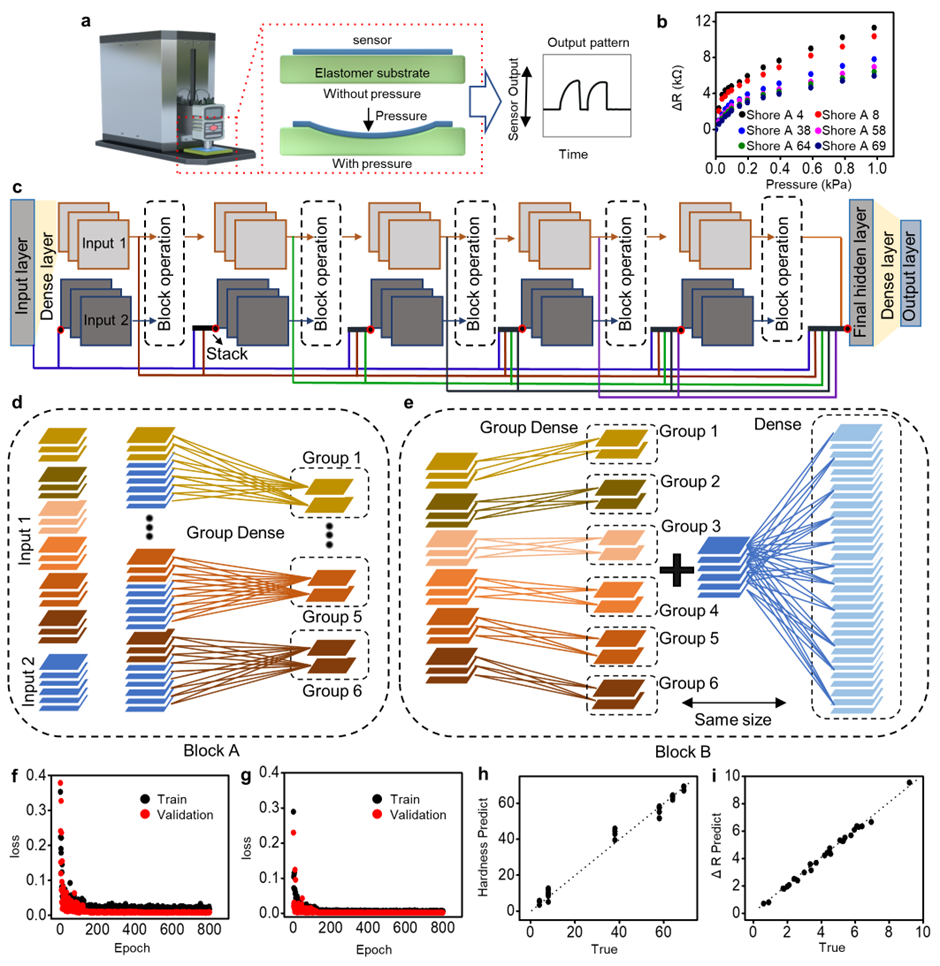

# Datal loading

In [ ]:
import numpy as np
data = np.load('벤딩_numpy_data_expand (1).npz')
train_data = data['train']
test_data = data['test']

# other metric test

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = train_data[:,:2]
# y = 1 * x_0 + 2 * x_1 + 3
y = train_data[:,2:3]
lr = LinearRegression().fit(X, y)
predict = lr.predict(test_data[:,:2])
gt = test_data[:,2:3]

In [ ]:
MAPE(predict,gt)

MAPE 20.283165954442183


In [ ]:
from sklearn.svm import SVR
import numpy as np
# Fit regression model
svr = SVR().fit(X, y[:,0])
# Predict
predict = svr.predict(test_data[:,:2])

In [ ]:
MAPE(predict,gt)

MAPE 85.36571484064564


In [ ]:
from sklearn import linear_model
import numpy as np
# Fit regression model
lassoReg = linear_model.Lasso(alpha=0.1)
lassoReg.fit(X,y)
# Predict
predict = lassoReg.predict(test_data[:,:2])

In [ ]:
MAPE(predict,gt)

MAPE 108.49619256851959


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
rfr = RandomForestRegressor(max_depth=3)
rfr.fit(X, y[:,0])
predict = rfr.predict(test_data[:,:2])

In [ ]:
MAPE(predict,gt)

MAPE 101.93361804230506


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)

# 훈련 데이터셋 X_train 의 거듭제곱을 생성한 뒤, 훈련 데이터셋 X_train 에 새로운 변수로 추가
X_train_poly = poly.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y)
X_test_poly = poly.transform(test_data[:,:2])
predict = lin_reg.predict(X_test_poly)

In [ ]:
MAPE(predict,gt)

MAPE 14.342003425519495


In [ ]:
X = train_data[:,1:]
y = train_data[:,:1]

In [ ]:
gt = test_data[:,:1]

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

lr = LinearRegression().fit(X, y)
predict = lr.predict(test_data[:,1:])


In [ ]:
MAPE(predict,gt)

MAPE 75.34155276019133


In [ ]:
svr = SVR().fit(X, y[:,0])
# Predict
predict = svr.predict(test_data[:,1:])

In [ ]:
MAPE(predict,gt)

MAPE 238.1978228476171


In [ ]:
lassoReg = linear_model.Lasso(alpha=0.1)
lassoReg.fit(X,y)
# Predict
predict = lassoReg.predict(test_data[:,1:])

In [ ]:
MAPE(predict,gt)

MAPE 210.15861635235962


In [ ]:
rfr = RandomForestRegressor(max_depth=3)
rfr.fit(X, y[:,0])
predict = rfr.predict(test_data[:,1:])

In [ ]:
MAPE(predict,gt)

MAPE 201.08283249068313


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)

# 훈련 데이터셋 X_train 의 거듭제곱을 생성한 뒤, 훈련 데이터셋 X_train 에 새로운 변수로 추가
X_train_poly = poly.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y)
X_test_poly = poly.transform(test_data[:,1:])
predict = lin_reg.predict(X_test_poly)

In [ ]:
MAPE(predict,gt)

MAPE 98.10475571618876


탄성도 일 시

In [ ]:
# train_data = np.delete(train_data, np.where(train_data[:,1]==0),0)
# test_data = np.delete(test_data, np.where(test_data[:,1]==0),0)

In [ ]:
len(train_data)

120

In [ ]:
train_data_ex_1 =  (train_data[:,1:2])**0.5
test_data_ex_1 =  (test_data[:,1:2])**0.5

train_data_ex_2 =  np.log(train_data[:,1:2]+1)
test_data_ex_2 =  np.log(test_data[:,1:2]+1)

train_data_ex_3 =  (train_data[:,1:2])**0.8
test_data_ex_3 =  (test_data[:,1:2])**0.8

train_data_ex_4 =  (train_data[:,1:2])**0.2
test_data_ex_4 =  (test_data[:,1:2])**0.2

train_data=np.concatenate((train_data[:,:2],train_data_ex_1,train_data_ex_2,train_data_ex_3,train_data_ex_4,train_data[:,2:3]),axis=1)
test_data=np.concatenate((test_data[:,:2],test_data_ex_1,test_data_ex_2,test_data_ex_3,test_data_ex_4, test_data[:,2:3]),axis=1)

In [ ]:
t_mean = np.mean(train_data, axis=0)
t_std = np.std(train_data, axis=0)


In [ ]:
t_mean

array([3.97666667e+01, 1.49750000e+01, 3.31310883e+00, 2.23723798e+00,
       7.99296033e+00, 1.50827588e+00, 4.18125000e+03])

In [ ]:
train_data_normalize = (train_data-t_mean)/t_std
test_data_normalize = (test_data-t_mean)/t_std

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

    
torch.cuda.is_available()

True

In [ ]:
print(torch.__version__)
import sys 
print(sys.version)
import platform
platform.platform()

1.10.0+cu111
3.7.13 (default, Mar 16 2022, 17:37:17) 
[GCC 7.5.0]


'Linux-5.4.144+-x86_64-with-Ubuntu-18.04-bionic'

In [ ]:
!nvidia-smi

Sat Aug 21 06:44:53 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    33W / 250W |    933MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
device = torch.device('cuda')  if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == torch.device('cuda') :
    torch.cuda.manual_seed_all(777)

In [ ]:
def apply_weight_decay(*modules, weight_decay_factor=1e-5, wo_bn=True, wo_gn=True):

    for module in modules:
        for m in module.modules():
            if hasattr(m, 'weight'):
                if wo_bn and isinstance(m, torch.nn.modules.batchnorm._BatchNorm):
                    continue
                if wo_gn and isinstance(m, nn.GroupNorm):
                    continue
                m.weight.grad += m.weight * weight_decay_factor

# Model

In [ ]:
# A memory-efficient implementation of Swish function
class SwishImplementation(torch.autograd.Function):
    @staticmethod
    def forward(ctx, i):
        result = i * torch.sigmoid(i)
        ctx.save_for_backward(i)
        return result

    @staticmethod
    def backward(ctx, grad_output):
        i = ctx.saved_tensors[0]
        sigmoid_i = torch.sigmoid(i)
        return grad_output * (sigmoid_i * (1 + i * (1 - sigmoid_i)))

class MemoryEfficientSwish(nn.Module):
    def forward(self, x):
        return SwishImplementation.apply(x)

In [ ]:
class Group_Linear(nn.Module):
    def __init__(self, inplanes, outplanes):
        super(Group_Linear, self).__init__()
        self.group_linear = nn.ModuleList([nn.Linear(inplanes//6,outplanes//6,bias=False) for i in range(6)])

    def forward(self, x):
      list_tensor = []
      for i, tens in enumerate(torch.split(x,x.size(1)//6,dim=1)):
         list_tensor.append(self.group_linear[i](tens))
      return torch.cat(list_tensor,dim=1)


In [ ]:
class Block(nn.Module):
    def __init__(self, inplanes, outplanes, p=0):
        super(Block, self).__init__()
        self.block = nn.Sequential(Group_Linear(inplanes, outplanes),
                                   nn.BatchNorm1d(outplanes),
                                   MemoryEfficientSwish(),
                                   nn.Dropout(p = p))

    def forward(self, x):
      return self.block(x)


In [ ]:
class Add_previous(nn.Module):
    def __init__(self, Blocks,inplanes,outplanes, p=0):
        super(Add_previous, self).__init__()
        self.current = Blocks
        self.previous = nn.Sequential(nn.Linear(inplanes,outplanes,bias=False),
                                      nn.Dropout(p = p))

    def forward(self, x, y):
      return self.current(x) + self.previous(y)


In [ ]:
import math
class Stack_2(nn.Module):
    def __init__(self, inplanes, outplanes):
        super(Stack_2, self).__init__()
        self.dropout = nn.Dropout(0.5)
        inplanes1 = inplanes
        self.f1 = nn.Linear(inplanes1,outplanes[0], bias=False)
        
        inplanes2 = inplanes1
        self.f2 = Add_previous(Block(outplanes[0],outplanes[1],0.1), inplanes2, outplanes[1],0.1)

        inplanes3 = inplanes1 + sum(outplanes[n] for n in range(0,1))
        self.f3 = Add_previous(Block(outplanes[1],outplanes[2],0.1), inplanes3, outplanes[2],0.1)
        
        inplanes4 = inplanes1 + sum(outplanes[n] for n in range(0,2))
        self.f4 = Add_previous(Block(outplanes[2],outplanes[3], 0.1),inplanes4, outplanes[3],0.1)

        inplanes5 = inplanes1 + sum(outplanes[n] for n in range(0,3))
        self.f5 = Add_previous(Block(outplanes[3],outplanes[4],0.2),inplanes5, outplanes[4],0.2)

        inplanes6 = inplanes1 + sum(outplanes[n] for n in range(0,4))
        self.f6 = Add_previous(Block(outplanes[4],outplanes[5],0.2),inplanes6, outplanes[5],0.2)

        # inplanes7 = inplanes1 + sum(outplanes[n] for n in range(0,5))
        # self.f7 = Add_previous(Block(outplanes[5],outplanes[6],0.3),inplanes7, outplanes[6],0.3)

        # inplanes8 = inplanes1 + sum(outplanes[n] for n in range(0,6))
        # self.f8 = Add_previous(Block(outplanes[6],outplanes[7],0.5),inplanes8, outplanes[7],0.5)


        inplanes7 = inplanes1 + sum(outplanes[n] for n in range(0,6))
        self.f7 = nn.Linear(inplanes7,1)
          
    def forward(self, x):
        x0 = x
        x1 = self.f1(x)

        x2 = self.f2(x1, x) 
        x = torch.cat((x1,x0),dim=1)

        x3 = self.f3(x2,x) 
        x = torch.cat((x2,x1,x0),dim=1)

        x4 = self.f4(x3,x) 
        x = torch.cat((x3,x2,x1,x0),dim=1)


        x5 = self.f5(x4,x) 
        x = torch.cat((x4,x3,x2,x1,x0),dim=1)

        x6 = self.f6(x5,x) 
        x = torch.cat((x6,x5,x4,x3,x2,x1,x0),dim=1)


        # x = self.dropout(x)
        x7 = self.f7(x)



        return x7

In [ ]:
class Stack_3(nn.Module):
    def __init__(self, inplanes, outplanes):
        super(Stack_3, self).__init__()
        inplanes1 = inplanes
        self.f1 = nn.Sequential(nn.Linear(inplanes1,64,bias=False),
                                   nn.BatchNorm1d(64),
                                   MemoryEfficientSwish(),
                                   nn.Dropout(p = 0.2))
        self.f2 = nn.Sequential(nn.Linear(64,128,bias=False),
                                   nn.BatchNorm1d(128),
                                   MemoryEfficientSwish(),
                                   nn.Dropout(p = 0.2))
        self.f3 = nn.Sequential(nn.Linear(128,256,bias=False),
                                   nn.BatchNorm1d(256),
                                   MemoryEfficientSwish(),
                                   nn.Dropout(p = 0.3))
        self.f4 = nn.Sequential(nn.Linear(256,512,bias=False),
                                   nn.BatchNorm1d(512),
                                   MemoryEfficientSwish(),
                                   nn.Dropout(p = 0.4))
        self.f5 = nn.Linear(512,1)


    def forward(self, x):

        x = self.f1(x)
        x = self.f2(x)
        x = self.f3(x)
        x = self.f4(x)
        x = self.f5(x)




        return x

In [ ]:
inplanes = 6
outplanes = [36*(x+1) for x in range(6)]
model = Stack_2(inplanes, outplanes)
model = model.to(device)

In [ ]:
model(torch.zeros(4,6).cuda())

tensor([[-0.0242],
        [-0.0242],
        [-0.0242],
        [-0.0242]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
model

Stack_2(
  (dropout): Dropout(p=0.5, inplace=False)
  (f1): Linear(in_features=6, out_features=36, bias=False)
  (f2): Add_previous(
    (current): Block(
      (block): Sequential(
        (0): Group_Linear(
          (group_linear): ModuleList(
            (0): Linear(in_features=6, out_features=12, bias=False)
            (1): Linear(in_features=6, out_features=12, bias=False)
            (2): Linear(in_features=6, out_features=12, bias=False)
            (3): Linear(in_features=6, out_features=12, bias=False)
            (4): Linear(in_features=6, out_features=12, bias=False)
            (5): Linear(in_features=6, out_features=12, bias=False)
          )
        )
        (1): BatchNorm1d(72, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): MemoryEfficientSwish()
        (3): Dropout(p=0.1, inplace=False)
      )
    )
    (previous): Sequential(
      (0): Linear(in_features=6, out_features=72, bias=False)
      (1): Dropout(p=0.1, inplace=False)
    )


# Functions

In [ ]:
from torch.optim.lr_scheduler import _LRScheduler
from torch.optim.lr_scheduler import ReduceLROnPlateau


class GradualWarmupScheduler(_LRScheduler):
    """ Gradually warm-up(increasing) learning rate in optimizer.
    Proposed in 'Accurate, Large Minibatch SGD: Training ImageNet in 1 Hour'.
    Args:
        optimizer (Optimizer): Wrapped optimizer.
        multiplier: target learning rate = base lr * multiplier if multiplier > 1.0. if multiplier = 1.0, lr starts from 0 and ends up with the base_lr.
        total_epoch: target learning rate is reached at total_epoch, gradually
        after_scheduler: after target_epoch, use this scheduler(eg. ReduceLROnPlateau)
    """

    def __init__(self, optimizer, multiplier, total_epoch, after_scheduler=None):
        self.multiplier = multiplier
        if self.multiplier < 1.:
            raise ValueError('multiplier should be greater thant or equal to 1.')
        self.total_epoch = total_epoch
        self.after_scheduler = after_scheduler
        self.finished = False
        super(GradualWarmupScheduler, self).__init__(optimizer)

    def get_lr(self):
        if self.last_epoch > self.total_epoch:
            if self.after_scheduler:
                if not self.finished:
                    self.after_scheduler.base_lrs = [base_lr * self.multiplier for base_lr in self.base_lrs]
                    self.finished = True
                return self.after_scheduler.get_last_lr()
            return [base_lr * self.multiplier for base_lr in self.base_lrs]

        if self.multiplier == 1.0:
            return [base_lr * (float(self.last_epoch) / self.total_epoch) for base_lr in self.base_lrs]
        else:
            return [base_lr * ((self.multiplier - 1.) * self.last_epoch / self.total_epoch + 1.) for base_lr in self.base_lrs]

    def step_ReduceLROnPlateau(self, metrics, epoch=None):
        if epoch is None:
            epoch = self.last_epoch + 1
        self.last_epoch = epoch if epoch != 0 else 1  # ReduceLROnPlateau is called at the end of epoch, whereas others are called at beginning
        if self.last_epoch <= self.total_epoch:
            warmup_lr = [base_lr * ((self.multiplier - 1.) * self.last_epoch / self.total_epoch + 1.) for base_lr in self.base_lrs]
            for param_group, lr in zip(self.optimizer.param_groups, warmup_lr):
                param_group['lr'] = lr
        else:
            if epoch is None:
                self.after_scheduler.step(metrics, None)
            else:
                self.after_scheduler.step(metrics, epoch - self.total_epoch)

    def step(self, epoch=None, metrics=None):
        if type(self.after_scheduler) != ReduceLROnPlateau:
            if self.finished and self.after_scheduler:
                if epoch is None:
                    self.after_scheduler.step(None)
                else:
                    self.after_scheduler.step(epoch - self.total_epoch)
                self._last_lr = self.after_scheduler.get_last_lr()
            else:
                return super(GradualWarmupScheduler, self).step(epoch)
        else:
            self.step_ReduceLROnPlateau(metrics, epoch)

# Data >> Tensor transform

## Change code for substrate hardness / sensor output

### for substrate hardness

In [ ]:
# # train_data_normalize = np.delete(train_data_normalize,[ 0, 29, 41, 61, 80, 98],0)

# # Numpy의 ndarray를 파이토치 텐서로 변환
# train_X = torch.tensor(train_data_normalize[:,1:], dtype=torch.float32)
# train_Y = torch.tensor(train_data_normalize[:,:1], dtype=torch.float32)
# test_X = torch.tensor(test_data_normalize[:,1:], dtype=torch.float32)
# test_Y = torch.tensor(test_data_normalize[:,:1], dtype=torch.float32)



# # Dataset 작성
# train_dataset = TensorDataset(train_X, train_Y)
# test_dataset = TensorDataset(test_X, test_Y)

# # 데이터 순서를 섞어서 64개씩 데이터를 반환하는 DataLoader
# train_loader = DataLoader(train_dataset, batch_size=12, shuffle=True, drop_last=True)
# test_loader = DataLoader(test_dataset, batch_size=18, shuffle=False)


# lossFunc = nn.MSELoss().to(device)



### for sensor output

In [ ]:

# Numpy의 ndarray를 파이토치 텐서로 변환
train_X = torch.tensor(train_data_normalize[:,:-1], dtype=torch.float32)
train_Y = torch.tensor(train_data_normalize[:,-1:], dtype=torch.float32)
test_X = torch.tensor(test_data_normalize[:,:-1], dtype=torch.float32)
test_Y = torch.tensor(test_data_normalize[:,-1:], dtype=torch.float32)



# Dataset 작성
train_dataset = TensorDataset(train_X, train_Y)
test_dataset = TensorDataset(test_X, test_Y)

# 데이터 순서를 섞어서 64개씩 데이터를 반환하는 DataLoader
train_loader = DataLoader(train_dataset, batch_size=12, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=18, shuffle=False)


lossFunc = nn.MSELoss().to(device)



# optimizer, lr scheduler

In [ ]:
optimizer = optim.RMSprop(model.parameters(), lr=0.0005)
scheduler_steplr = torch.optim.lr_scheduler.MultiStepLR(optimizer,  [120, 400, 750], gamma=0.1, last_epoch=-1)
lr_scheduler = GradualWarmupScheduler(optimizer, multiplier=1, total_epoch=5, after_scheduler=scheduler_steplr)


# Ln-cosh loss 

In [ ]:

# A memory-efficient implementation of Swish function
class new_loss(torch.autograd.Function):
    @staticmethod
    def forward(ctx, i):
        result = torch.log((torch.exp(i)+torch.exp(-i))/2)
        ctx.save_for_backward(i)
        return result

    @staticmethod
    def backward(ctx, grad_output):
        i = ctx.saved_tensors[0]
        return grad_output * (torch.tanh(i))

class MemoryEfficientnew_loss(nn.Module):
    def forward(self, x):
        return new_loss.apply(x)

# training function

In [ ]:
from torch.autograd import Variable
import torch.nn.functional as F
import time


def optimization_step(model, loss, data1, optimizer):
    """Make forward pass and update model parameters with gradients."""
    x_batch1, y_batch1 = data1
    x_batch1, y_batch1 = x_batch1.to(device), y_batch1.to(device)
    logits = model(x_batch1)
    logits = logits

    # compute logloss
    loss_value = MemoryEfficientnew_loss()(logits-y_batch1)
    loss_value = torch.mean(loss_value)
    batch_loss = loss_value.item()


    # compute gradients
    optimizer.zero_grad()
    loss_value.backward()
    apply_weight_decay(model, weight_decay_factor=5e-4)

    # update params
    optimizer.step()

    return batch_loss


def train(model, loss,
          train_iterator1, val_iterator, optimizer, n_epochs=30, lr_scheduler=None):

    # collect losses and accuracies here
    all_losses = []
    running_loss = 0.0
    n_steps = 0
    start_time = time.time()
    model.train()
    best_loss =50

    for epoch in range(0, n_epochs):  
        # main training loop
        for data1 in train_iterator1:
            batch_loss = optimization_step(
                model, loss, data1, optimizer
            )
            running_loss += batch_loss
            n_steps += 1

        # evaluation
        model.eval()
        test_loss = _evaluate(
            model, loss, val_iterator
        )


        # collect evaluation information and print it
        all_losses += [(
            epoch,
            running_loss/n_steps, test_loss
        )]
        print('{0}  {1:.3f} {2:.3f} {3:.3f}'.format(
            *all_losses[-1], time.time() - start_time
        ))


        if lr_scheduler is not None:
            # possibly change the learning rate
            lr_scheduler.step()
            print(lr_scheduler.get_last_lr())

        if test_loss < best_loss:
          torch.save({'model_state_dict': model.state_dict()}, 'bending.pth')                   
          best_loss = test_loss
        
        running_loss = 0.0
        n_steps = 0
        start_time = time.time()
        model.train()
        
    return all_losses




def _evaluate(model, loss, val_iterator):

    loss_value = 0.0
    total_samples = 0
    with torch.no_grad():

        for x_batch, y_batch in val_iterator:

            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
 
            n_batch_samples = y_batch.size()[0]
            logits = model(x_batch)
            logits = logits

            # compute logloss
            batch_loss = torch.mean(MemoryEfficientnew_loss()(logits-y_batch)).item()

            loss_value += batch_loss*n_batch_samples
            total_samples += n_batch_samples

    return loss_value/total_samples





# Train

In [ ]:
#저항
all_losses = train(model, lossFunc,
          train_loader, test_loader, optimizer, n_epochs=800, lr_scheduler=lr_scheduler)

In [ ]:
# #탄성도
# all_losses = train(model, lossFunc,
#           train_loader, test_loader, optimizer, n_epochs=800, lr_scheduler=lr_scheduler)

## Dense

In [ ]:
# #저항
# all_losses = train(model, lossFunc,
#           train_loader, test_loader, optimizer, n_epochs=800, lr_scheduler=lr_scheduler)

In [ ]:
#저항
all_losses = train(model, lossFunc,
          train_loader, test_loader, optimizer, n_epochs=800, lr_scheduler=lr_scheduler)

In [ ]:
# #탄성
# all_losses = train(model, lossFunc,
#           train_loader, test_loader, optimizer, n_epochs=800, lr_scheduler=lr_scheduler)

## load best model

In [ ]:
checkpoint = torch.load('bending.pth')
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

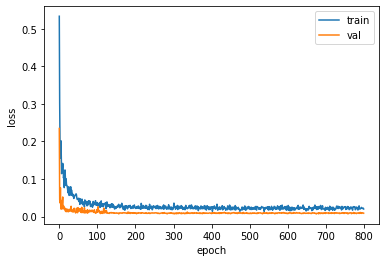

In [ ]:
#저항 변화
epochs = [x[0] for x in all_losses]
plt.plot(epochs, [x[1] for x in all_losses], label='train');
plt.plot(epochs, [x[2] for x in all_losses], label='val');
plt.legend();
plt.xlabel('epoch');
plt.ylabel('loss');

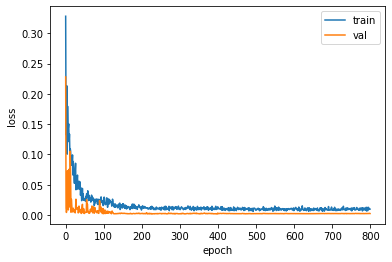

In [ ]:
#저항 변화
epochs = [x[0] for x in all_losses]
plt.plot(epochs, [x[1] for x in all_losses], label='train');
plt.plot(epochs, [x[2] for x in all_losses], label='val');
plt.legend();
plt.xlabel('epoch');
plt.ylabel('loss');

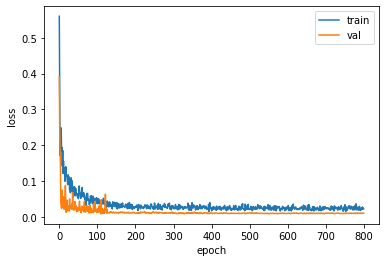

In [ ]:
# 탄성도
epochs = [x[0] for x in all_losses]
plt.plot(epochs, [x[1] for x in all_losses], label='train');
plt.plot(epochs, [x[2] for x in all_losses], label='val');
plt.legend();
plt.xlabel('epoch');
plt.ylabel('loss');

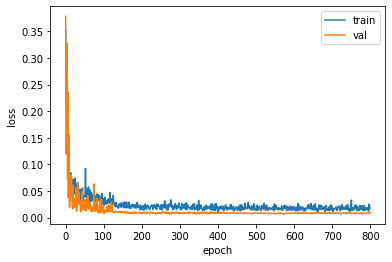

In [ ]:
# 탄성도
epochs = [x[0] for x in all_losses]
plt.plot(epochs, [x[1] for x in all_losses], label='train');
plt.plot(epochs, [x[2] for x in all_losses], label='val');
plt.legend();
plt.xlabel('epoch');
plt.ylabel('loss');

# Extract predict and gt values

In [ ]:
i =1
predict = torch.tensor([[]])
model.eval()
for data in test_loader:
  if i ==1:
    gt = data[1]
    predict = model(data[0].to(device))
  else:
    gt = torch.cat((gt,data[1]), dim=0)
    predict = torch.cat((predict,model(data[0].to(device))), dim=0)
  i +=1
  


In [ ]:
gt = gt.cpu().detach().numpy()
predict = predict.cpu().detach().numpy()

## 탄성도/저항변화 선택

In [ ]:
# #탄성도 output일 때 원래대로 돌리기
# gt[:,0] = (gt[:,0]*t_std[0]+t_mean[0])
# predict[:,0] = (predict[:,0]*t_std[0]+t_mean[0])

#저항변화 output일 때 원래대로 돌리기
gt[:,0] = (gt[:,0]*t_std[-1]+t_mean[-1])
predict[:,0] = (predict[:,0]*t_std[-1]+t_mean[-1])


# SCATTERPLOT

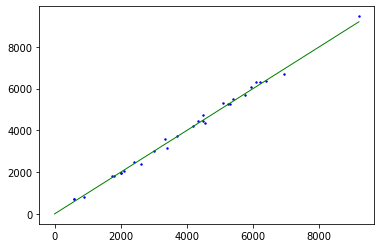

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(gt[:,0],predict[:,0], c='blue', s=2)

plt.plot([0, np.max(gt[:,0])], [0, np.max(gt[:,0])], color="green", lw=1, linestyle='solid')



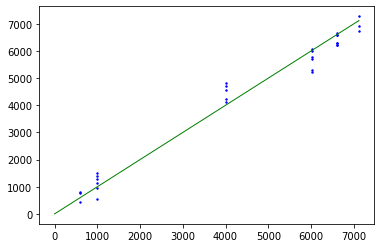

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(gt[:,0],predict[:,0], c='blue', s=2)

plt.plot([0, np.max(gt[:,0])], [0, np.max(gt[:,0])], color="green", lw=1, linestyle='solid')



## dense

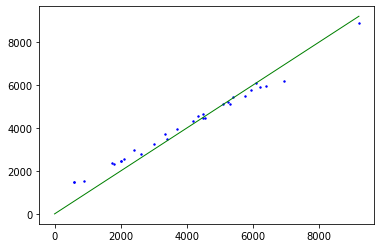

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(gt[:,0],predict[:,0], c='blue', s=2)

plt.plot([0, np.max(gt[:,0])], [0, np.max(gt[:,0])], color="green", lw=1, linestyle='solid')



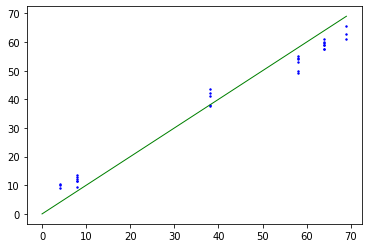

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(gt[:,0],predict[:,0], c='blue', s=2)

plt.plot([0, np.max(gt[:,0])], [0, np.max(gt[:,0])], color="green", lw=1, linestyle='solid')



# METRIC

In [ ]:
def MAPE(predict,gt):
  MAPE = 100*(np.mean(np.abs((predict-gt)/gt)))
  print(f'MAPE {MAPE}')

In [ ]:
 MAPE(predict,gt)

MAPE 4.1393715888261795


In [ ]:
 MAPE(predict,gt)

MAPE 12.999694049358368


#Dense

In [ ]:
 MAPE(predict,gt)

MAPE 20.277585089206696


In [ ]:
 MAPE(predict,gt)

MAPE 29.593366384506226


# Save

In [ ]:
# from openpyxl import Workbook
 
# write_wb = Workbook()
 
# #이름이 있는 시트를 생성
# #write_ws = write_wb.create_sheet('생성시트')
 
# #Sheet1에다 입력
# write_ws = write_wb.active
 
# #행 단위로 추가
# for i in range(len(all_losses)):
#   write_ws.append(list(all_losses[i]))
 
# #셀 단위로 추가
# write_wb.save('Dense_탄성도_epoch-loss.xlsx')

In [ ]:
# scat = np.concatenate((gt[:,0:1],predict[:,0:1]),axis=1)

In [ ]:
# from openpyxl import Workbook
 
# write_wb = Workbook()
 
# #이름이 있는 시트를 생성
# #write_ws = write_wb.create_sheet('생성시트')
 
# #Sheet1에다 입력
# write_ws = write_wb.active
 
# #행 단위로 추가
# for i in range(len(scat)):
#   write_ws.append(list(scat[i]))
 
# #셀 단위로 추가
# write_wb.save('저항_scatter.xlsx')